# Notebook #2: Time to pivot

The first notebook was good -- I was able to get a model going with Detecto, and draw bounding boxes around detected items.  But there are some things that occurred to me after this:

- Labelling every single fork, spoon or knife in the cutlery drawer is going to be tedious.  Labelling plates, bowls or cups would probably be _less_ tedious.
- A simple Flask API would let me build up a page quickly ("Delivering value at the speed of copy-paste!"), and let people use their phone to take and submit a picture for analysis.

I tackled the last problem first; have a look at src/rest_api, and the `make devel-api` target in the Makefile in the root directory.

I'd like to tackle the first problem now, which means getting some data that's been annotated and doing some training.

In the course of thinking about all this, I came across [roboflow.com](roboflow.com).  I thought originally they dealt in synthetic data, but that's not correct; they do _augmented_ data for CV training instead.  That means things like cropping pictures randomly, fiddling with saturation, blurring, and so on.  You can sign up for free, the annotation tool is decent, and I was able to get started quickly.  (I get nothing from them; I'm a satisfied, non-paying customer on their free tier.)

One thing I didn't record in my previous notebook:  what format did I use?  Was it Yolo, VOC or CSV?  Looking at my `dishwasher_training_data` repo, which I keep safely on my laptop, I see XML files -- so I'm assuming VOC.  Roboflow offers that as an export option for their annotated-and-augmented data sets, so I'll grab that.

I've uploaded the dataset to Google Drive.  I *thought* I had accounted for switching between Colab and working locally programmaticall before, but I can't find that. :-(  Let's see what I can do.

[This StackExchange question](https://stackoverflow.com/questions/53581278/test-if-notebook-is-running-on-google-colab) as a way to do it.

In [14]:
import os
from pathlib import Path

if 'COLAB_GPU' in os.environ:
    print("I'm running on Colab")
    COLAB = True
    from google.colab import drive
    drive.mount('/content/gdrive')
    dataset_root = Path('/content/gdrive/MyDrive/dishwasher_training_data/roboflow')
else:
    print("Nope, not on Colab")
    COLAB = False
    dataset_root = Path('/home/aardvark/dev/dishwasher_training_data/roboflow')

training = dataset_root/'train/'
test = dataset_root/'test'
valid = dataset_root/'valid'

I'm running on Colab
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Let's look at an image:

In [26]:
from IPython.display import Image

all_training_imgs = [img for img in training.glob("*jpg")]

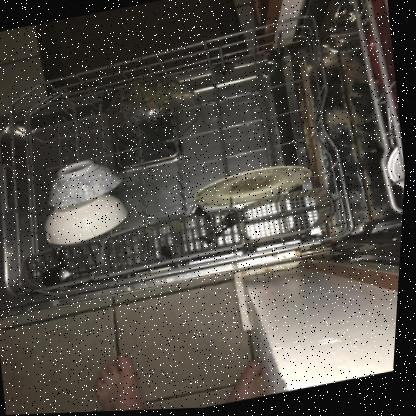

In [31]:
first_img = all_training_imgs[0]

str(first_img.resolve())
Image(filename=str(first_img.resolve()))

All right, let's see if we can train this!

First, let's make sure we have detecto installed:

In [32]:
!pip install detecto

Next, copying from the first notebook, we set up a dataset of the training photos.  Our `training` variable is a Pathlib.PosixPath, not a string, so we need to coerce it.

In [38]:
from detecto.core import Dataset

dataset = Dataset(str(training.resolve()))

Next, let's look at one of the images with its bounding boxes in there:

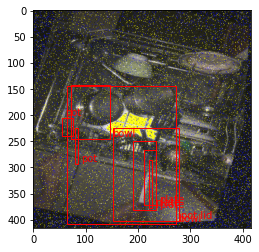

In [39]:
from detecto.visualize import show_labeled_image

image, targets = dataset[4]
show_labeled_image(image, targets['boxes'], targets['labels'])

Huh...that does *not* look right.  I'll need to figure out what's going on here, but it looks like the bounding boxes are wrong -- I thought they were supposed to be adjusted by roboflow during their augmentation.

I'm probably doing something wrong, just need to figure out what that is.
